# Clase 3

Trabajo con pandas, interacción básica con matplotlib e introducción a Bio-python para poder leer secuencias.

In [1]:
import pandas as pd
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # usar el estilo de ggplot2 en gráficas de matplotlib

In [2]:
%matplotlib inline

In [3]:
# Crear un DataFrame con 4 columnas y 1000 número aleatorios en cada una.
df = pd.DataFrame({'col1': randn(1000) + 1, 'col2': randn(1000),
                 'col3': randn(1000) - 1, 'col4' : np.round(randn(1000)+5)})

In [4]:
df.head(10)  # ver los primeros elementos del DataFrame (default: 5)

,col1,col2,col3,col4
0,2.665647,2.191440,-1.647508,5
1,1.330969,-1.766415,-2.343255,4
2,0.944129,0.332002,-3.263961,4
3,0.356328,1.122843,-1.913682,6
4,1.971828,1.428555,-1.048226,6
5,1.357758,-0.497489,0.529604,6
6,1.307299,0.785503,-2.940388,5
7,-0.453187,-0.763947,-1.438371,6
8,1.457697,1.802620,0.252855,5
9,0.420599,0.782334,-0.547564,6


In [5]:
df.describe()  # obtener una descripción general de los datos contenidos en el DataFrame

,col1,col2,col3,col4
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.007952,-0.006532,-1.047937,5.013000
std,0.973721,1.015860,1.035900,1.002914
min,-2.326250,-3.049916,-4.467917,2.000000
25%,0.396759,-0.728032,-1.748206,4.000000
50%,0.981360,-0.011505,-1.011700,5.000000
75%,1.640218,0.670808,-0.373205,6.000000
max,4.418073,3.147155,2.300527,8.000000


In [6]:
df.info()  # obtener información del DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 4 columns):
col1    1000 non-null float64
col2    1000 non-null float64
col3    1000 non-null float64
col4    1000 non-null float64
dtypes: float64(4)
memory usage: 39.1 KB


In [7]:
#df["col1"].mean()  # media de una columna
df.col1.mean()

1.0079522145185038

In [8]:
df["col2"].std()

1.0158600985492501

In [9]:
df["col3"].sum()

-1047.9372195024839

In [10]:
df["col2"].min()

-3.049915785031363

In [11]:
df["col1"].max()

4.4180733574468487

####El objeto DataFrame de pandas ya tiene funciones específicas para graficar

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b89e2ee48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6b89d3a3c8>]], dtype=object)

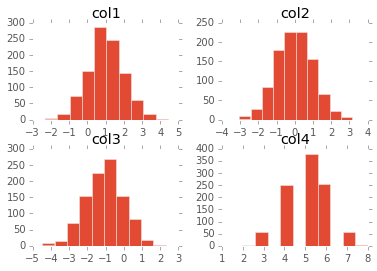

In [12]:
df.hist()  # Graficar un histograma de cada una de las columnas del DataFrame

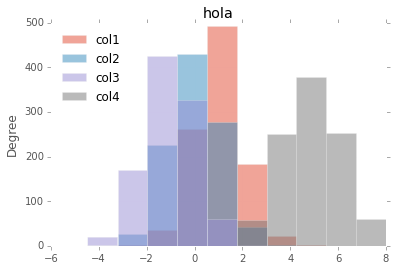

In [13]:
# la función 'plot' puede generar cualquier tipo de gráfica
df.plot(kind="hist", alpha=0.5, title="hola")  # genear un histograma con las 4 columnas

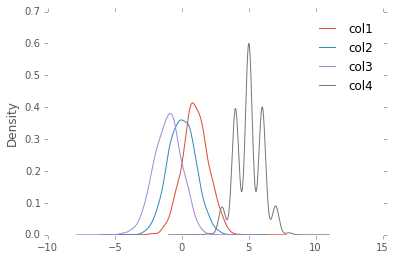

In [14]:
df.plot(kind="density")

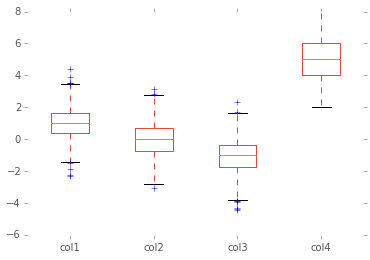

In [15]:
df.plot(kind="box")

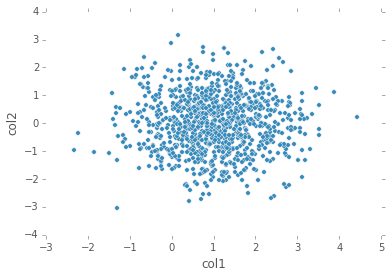

In [16]:
df.plot(x="col1", y="col2", kind="scatter")

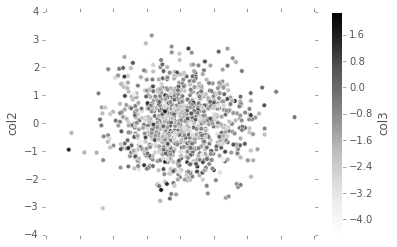

In [17]:
df.plot(x="col1", y="col2", c="col3", kind="scatter")

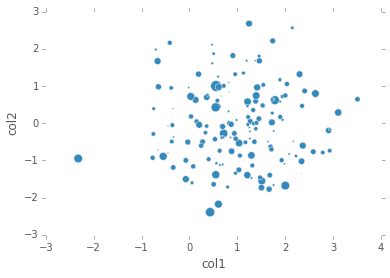

In [18]:
df.plot(x="col1", y="col2", s=df["col3"]*50, kind="scatter")

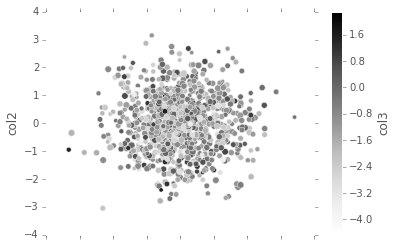

In [19]:
df.plot(x="col1", y="col2", c="col3", s=df["col4"]*6, kind="scatter")

## Biopython

[Bio-python](http://biopython.org) permite representar secuencias biológicas y anotaciones de genomas y es capaz de comunicar con las bases de datos biológicos en línea del NCBI para hacer cálculos. Además, gracias a diversos módulos, puede ser utilizada para trabajar sobre proyectos relativos al alineamiento de secuencias, cálculo de estructuras proteicas, genética de poblaciones, filogenética e inteligencia artificial. (sudo pip install biopython)

In [20]:
from Bio import SeqIO

Leer secuencias en formato fasta o fastq es muy fácil con SeqIO.

La función para haerlo es SeqIO.parse("ruta/al/archivo", "formato")

In [21]:
sequences = list(SeqIO.parse("consensusVJ.fa", "fasta"))

### Verificar las secuencias leidas

In [22]:
len(sequences)

1004

In [23]:
sequences[0]

SeqRecord(seq=Seq('CCAGAGATCGAAGAACCCCTCCAAAGCCTCCTCCCGCACACA', SingleLetterAlphabet()), id='HA7IYCV01_3k.IGHV3-66.IGHJ2.0', name='HA7IYCV01_3k.IGHV3-66.IGHJ2.0', description='HA7IYCV01_3k.IGHV3-66.IGHJ2.0', dbxrefs=[])

In [24]:
print(sequences[0])

ID: HA7IYCV01_3k.IGHV3-66.IGHJ2.0
Name: HA7IYCV01_3k.IGHV3-66.IGHJ2.0
Description: HA7IYCV01_3k.IGHV3-66.IGHJ2.0
Number of features: 0
Seq('CCAGAGATCGAAGAACCCCTCCAAAGCCTCCTCCCGCACACA', SingleLetterAlphabet())


In [25]:
sequences[0].id

'HA7IYCV01_3k.IGHV3-66.IGHJ2.0'

In [26]:
sequences[0].seq

Seq('CCAGAGATCGAAGAACCCCTCCAAAGCCTCCTCCCGCACACA', SingleLetterAlphabet())

In [27]:
str(sequences[0].seq)

'CCAGAGATCGAAGAACCCCTCCAAAGCCTCCTCCCGCACACA'

In [28]:
len(str(sequences[0].seq))

42

## Dandole un poco más de utilidad

Hacer una función para hacer un DataFrame con el contenido siguiente:

* ID de la lectura
* La secuencia
* La longitud de la secuencia

La función debe recibir la lista de las secuencias y retornar un DataFrame con las columnas antes descritas.

Ayuda.

Para crear un DataFrame se puede utilizar cualquiera de las siguientes formas


> df = pd.DataFrame({'col1': list("ABCDE"), 'col2': list("FGHIJ")})

 o

> df = pd.DataFrame()

> df["col1"] = list("ABCDE")

In [29]:
def sequence_list2data_frame(sequences):
    """ Function: sequence_list2data_frame
    
    Params
    ---------
      sequences - List of SeqRecord objects
      
    Return
    ---------
      DataFrame with ID, Sequence, Length columns
    """
    ids  = list()  # IDs list
    seqs = list()  # Sequences list
    lens = list()  # lengths list
    
    for sequence in sequences:
        ids.append(sequence.id)
        seqs.append(str(sequence.seq))
        lens.append( len( str(sequence.seq) ) )
        
    #df = pd.DataFrame({"IDs":ids, "Seq":seqs, "Len": lens})
    df = pd.DataFrame()
    df["IDs"] = ids
    df["Seq"] = seqs
    df["Len"] = lens
    
    return df

df = sequence_list2data_frame(sequences)

In [30]:
df.head()

,IDs,Seq,Len
0,HA7IYCV01_3k.IGHV3-66.IGHJ2.0,CCAGAGATCGAAGAACCCCTCCAAAGCCTCCTCCCGCACACA,42
1,HA7IYCV01_3k.IGHV3-66.IGHJ2.1,CCAGAGATCGAAGAAGCCGTCCAAAGGGTCCTCCCTCGTACA,42
2,HA7IYCV01_3k.IGHV4-61.IGHJ6.0,CCAAACGTCCAAACCGCTGCCGTATTCATAATCTCTCGCACA,42
3,HA7IYCV01_3k.IGHV4-61.IGHJ6.1,CCAGACGTCCAGGCCCTTGCCGTAGTCGTGATCTCTCGCACA,42
4,HA7IYCV01_3k.IGHV4-61.IGHJ6.2,CCAGACGTCCATAGCGTAATCGTATCCGTTCCGGAATAACCCTCTC...,51


In [31]:
df.describe()

,Len
count,1004.000000
mean,51.199203
std,11.390125
min,15.000000
25%,45.000000
50%,51.000000
75%,57.250000
max,90.000000


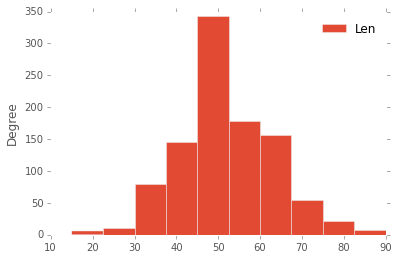

In [32]:
df.plot(kind="hist")

In [33]:
df2 = df.get(df["Len"] >= 40 )  # obtener las secuencias con longitud mayor a 40

In [34]:
df2.head()

,IDs,Seq,Len
0,HA7IYCV01_3k.IGHV3-66.IGHJ2.0,CCAGAGATCGAAGAACCCCTCCAAAGCCTCCTCCCGCACACA,42
1,HA7IYCV01_3k.IGHV3-66.IGHJ2.1,CCAGAGATCGAAGAAGCCGTCCAAAGGGTCCTCCCTCGTACA,42
2,HA7IYCV01_3k.IGHV4-61.IGHJ6.0,CCAAACGTCCAAACCGCTGCCGTATTCATAATCTCTCGCACA,42
3,HA7IYCV01_3k.IGHV4-61.IGHJ6.1,CCAGACGTCCAGGCCCTTGCCGTAGTCGTGATCTCTCGCACA,42
4,HA7IYCV01_3k.IGHV4-61.IGHJ6.2,CCAGACGTCCATAGCGTAATCGTATCCGTTCCGGAATAACCCTCTC...,51


In [35]:
df2.describe()

,Len
count,853.000000
mean,54.177022
std,9.422047
min,40.000000
25%,48.000000
50%,51.000000
75%,60.000000
max,90.000000


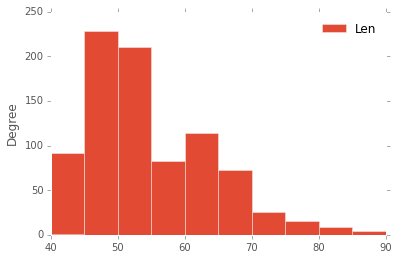

In [36]:
df2.plot(kind="hist")

### función para regresar el DataFrame a una lista de secuencias (objetos SeqRecord)

In [39]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import IUPAC

def data_frame2list(df, id_colname, seq_colname):
	""" Function: data_frame2list
	Description: Function to convert a pandas DataFrame into a list
	of SeqRecord objects

	Params
	-------

	 df - pandas DataFrame 
	 id_colname - ID's column name
	 seq_colname - Sequence column name

	Return
	--------
	 list of sequences (list of SeqRecord objects)
	"""
	ids = list(df[id_colname])
	seqs = list(df[seq_colname])
	sequences = list()

	for i in range(len(ids)):
		id = ids[i]
		seq = seqs[i]
		record = SeqRecord(Seq(seq, IUPAC.ambiguous_dna), 
			id=id, name=id, description="")
		sequences.append(record)

	return sequences


sequences2 = data_frame2list(df, "IDs", "Seq")

Por último, escribimos las secuencias a un archivo Fasta

In [40]:
SeqIO.write(sequences2, "archivo.fa", "fasta")

1004